# Checkpoint Five: Modeling Data

With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset: https://www.kaggle.com/andrewmvd/data-analyst-jobs

## Prepare Your Dataframe

Import any libraries you need and create a dataframe.

In [1]:
#supress warnings please
import warnings
warnings.filterwarnings('ignore')
#import libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

#create dataframe
df=pd.DataFrame(pd.read_excel("DataAnalystCleaned.xlsx"))
df

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Type of ownership,Sector,Revenue,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY",201 to 500 employees,Nonprofit Organization,Non-Profit,$100 to $500 million (USD),True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY",10000+ employees,Nonprofit Organization,Health Care,$2 to $5 billion (USD),-1
2,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY",201 to 500 employees,Subsidiary or Business Segment,Information Technology,$50 to $100 million (USD),-1
3,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY",501 to 1000 employees,Company - Private,"Arts, Entertainment & Recreation",$100 to $500 million (USD),True
4,5,Data Analyst,$37K-$66K (Glassdoor est.),About Cubist\nCubist Systematic Strategies is ...,3.9,Point72\n3.9,"New York, NY",1001 to 5000 employees,Company - Private,Finance,Unknown / Non-Applicable,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
1779,2246,"Technical Business Analyst (SQL, Data analytic...",$78K-$104K (Glassdoor est.),Spiceorb is looking for Technical Business Ana...,-1.0,Spiceorb,"Denver, CO",-1,-1,-1,-1,-1
1780,2247,Marketing/Communications - Data Analyst-Marketing,$78K-$104K (Glassdoor est.),Job Description\nJob Title: Marketing/Communic...,4.1,APN Software Services Inc.\n4.1,"Broomfield, CO",51 to 200 employees,Company - Private,Information Technology,$25 to $50 million (USD),-1
1781,2248,RQS - IHHA - 201900004460 -1q Data Security An...,$78K-$104K (Glassdoor est.),Maintains systems to protect data from unautho...,2.5,"Avacend, Inc.\n2.5","Denver, CO",51 to 200 employees,Company - Private,Business Services,Unknown / Non-Applicable,-1
1782,2250,"Technical Business Analyst (SQL, Data analytic...",$78K-$104K (Glassdoor est.),"Title: Technical Business Analyst (SQL, Data a...",-1.0,Spiceorb,"Denver, CO",-1,-1,-1,-1,-1


In [2]:
#shape
df.shape

#info
df.info()

#describe
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1784 entries, 0 to 1783
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1784 non-null   int64  
 1   Job Title          1784 non-null   object 
 2   Salary Estimate    1784 non-null   object 
 3   Job Description    1784 non-null   object 
 4   Rating             1784 non-null   float64
 5   Company Name       1783 non-null   object 
 6   Location           1784 non-null   object 
 7   Size               1784 non-null   object 
 8   Type of ownership  1784 non-null   object 
 9   Sector             1784 non-null   object 
 10  Revenue            1784 non-null   object 
 11  Easy Apply         1784 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 167.4+ KB


,Unnamed: 0,Rating
count,1784.000000,1784.000000
mean,1120.788677,3.160594
std,654.109082,1.680751
min,0.000000,-1.000000
25%,556.750000,3.100000
50%,1125.000000,3.600000
75%,1693.500000,4.100000
max,2251.000000,5.000000


## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.

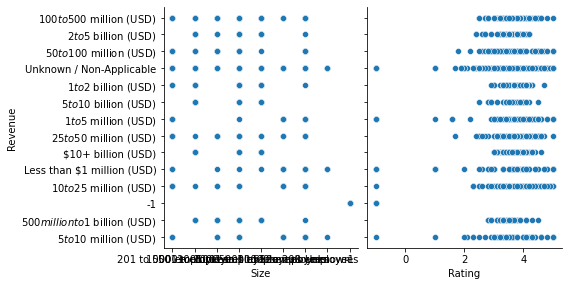

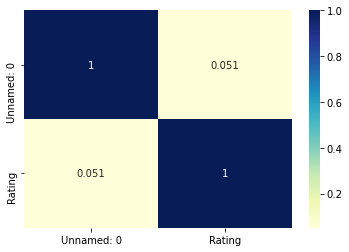

In [3]:
#pairplot
sb.pairplot(df, x_vars=["Size", "Rating"],
           y_vars="Revenue", size=4, aspect=1, kind="scatter")
plt.show()
#heatmap
sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

In [9]:
#create x and y variables
X=df['Size']
y=df['Salary Estimate']

In [10]:
#create train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7,
                                                   test_size = 0.3, random_state = 100)

In [11]:
#build the model
X_train
y_train

1042      $24K-$48K (Glassdoor est.)
1166    $110K-$190K (Glassdoor est.)
315      $98K-$114K (Glassdoor est.)
1361      $40K-$72K (Glassdoor est.)
1540     $99K-$178K (Glassdoor est.)
                    ...             
53        $46K-$87K (Glassdoor est.)
350       $26K-$47K (Glassdoor est.)
79        $51K-$88K (Glassdoor est.)
792      $46K-$102K (Glassdoor est.)
1544     $99K-$178K (Glassdoor est.)
Name: Salary Estimate, Length: 1248, dtype: object

## Error Terms

Finally, plot your error terms!

In [12]:
#perform residual analysis
import statsmodels.api as sm

#add a constant
X_train_sm = sm.add_constant(X_train)

In [13]:
#fit the regression line with OLS
lr = sm.OLS(y_train, X_train_sm).fit()

#print parameters
lr.params

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

## Summarize Your Work

Make notes of your answers to the questions below.

1. What was your R-squared value? I don't have that information.
2. Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset? It was not effective this time.
3. Was your plot of the error terms a bell curve? I was unable to plot error terms.